In [19]:
import torch 

# ref = torch.stack(torch.load("representations_ref.pt"), dim=0).cpu().float()
# gen = torch.stack(torch.load("representations_gen.pt"), dim=0).cpu().float()
# test = torch.stack(torch.load("representations_test.pt"), dim=0).cpu().float()

ref = torch.stack(torch.load("gradients_ref_v_proj.pt"), dim=0).cpu().float()
gen = torch.stack(torch.load("gradients_gen_v_proj.pt"), dim=0).cpu().float()
test = torch.stack(torch.load("gradients_test_v_proj.pt"), dim=0).cpu().float()

In [20]:
print(ref.shape)
print(gen.shape)
print(test.shape)

torch.Size([47, 4096])
torch.Size([500, 4096])
torch.Size([500, 4096])


In [21]:
def compute_cosine_sim(v1, v2):
    # Normalize the gradients
    norms = v1.norm(dim=1, keepdim=True)  # Compute norms of each vector
    normalized_v1 = v1 / norms  # Normalize gradients

    norms = v2.norm(dim=1, keepdim=True)  # Compute norms of each vector
    normalized_v2 = v2 / norms  # Normalize gradients
    
    # Compute pairwise cosine similarity
    cosine_similarity_matrix = torch.mm(normalized_v1, normalized_v2.t()).float()
    return cosine_similarity_matrix

Text(0.5, 1.0, 'Last Token Representation Similarity')

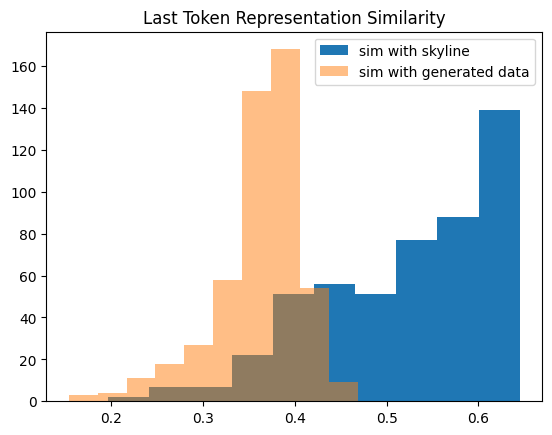

In [18]:
import matplotlib.pyplot as plt

plt.hist(torch.mean(compute_cosine_sim(ref, test), dim=0), label="sim with skyline")
plt.hist(torch.mean(compute_cosine_sim(ref, gen), dim=0), alpha=0.5, label="sim with generated data")
plt.legend()
plt.title("Last Transformer (V Proj Matrix) Gradient Similarity")

(array([  91.,  483., 1556., 4322., 6441., 7399., 2914.,  236.,   42.,
          16.]),
 array([0.07484197, 0.13595055, 0.19705912, 0.25816771, 0.31927627,
        0.38038486, 0.44149345, 0.50260204, 0.56371057, 0.62481916,
        0.68592775]),
 <BarContainer object of 10 artists>)

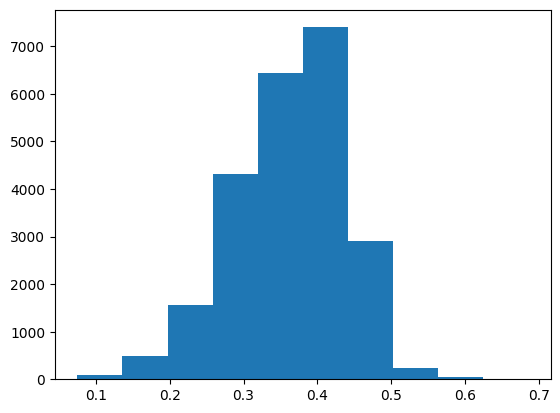

In [14]:
plt.hist(torch.flatten(compute_cosine_sim(ref, gen)))

In [135]:
compute_cosine_sim(ref_gradients, gen_gradients).max(dim=0).values

tensor([0.1943, 0.2217, 0.2852, 0.2451, 0.2354, 0.2275, 0.2539, 0.2617, 0.2520,
        0.2422, 0.2314, 0.2334, 0.2393, 0.1963, 0.1670, 0.1455, 0.1079, 0.0884,
        0.0732, 0.1094, 0.1094, 0.1138, 0.1289, 0.1611, 0.1689, 0.1709, 0.1670,
        0.1680, 0.1631, 0.1475, 0.1465, 0.1328, 0.1602, 0.1621, 0.1592, 0.1484,
        0.1465, 0.1377, 0.1260, 0.1250, 0.1357, 0.1621, 0.1670, 0.1650, 0.1611,
        0.1748, 0.1768, 0.1689, 0.1621, 0.1631, 0.1631, 0.1689, 0.1895, 0.1797,
        0.1895, 0.1758, 0.1748, 0.1738, 0.1670, 0.1768, 0.1631, 0.1689, 0.1689,
        0.1641, 0.1631, 0.1650, 0.1709, 0.1660, 0.1680, 0.1729, 0.1768, 0.1748,
        0.1768, 0.1729, 0.1699, 0.1689, 0.1699, 0.1543, 0.1514, 0.1592, 0.1582,
        0.1582, 0.1562, 0.1631, 0.1670, 0.1582, 0.1562, 0.1533, 0.1602, 0.1621,
        0.1553, 0.1455, 0.1475, 0.1504, 0.1572, 0.1621, 0.1582, 0.1553, 0.1523,
        0.1602, 0.1660, 0.1621, 0.1689, 0.1650, 0.1631, 0.1650, 0.1641, 0.1689,
        0.1621, 0.1650, 0.1582, 0.1602, 

(array([2.300e+01, 8.400e+01, 1.810e+02, 5.580e+02, 2.044e+03, 4.468e+03,
        1.312e+04, 2.915e+03, 9.900e+01, 8.000e+00]),
 array([-0.44726562, -0.37753907, -0.30781251, -0.23808594, -0.16835937,
        -0.09863281, -0.02890625,  0.04082031,  0.11054687,  0.18027344,
         0.25      ]),
 <BarContainer object of 10 artists>)

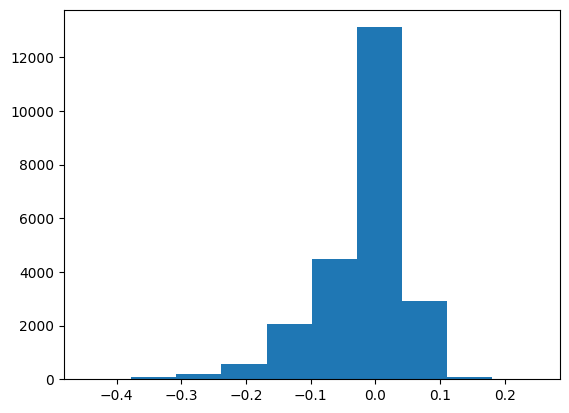

In [136]:
plt.hist(compute_cosine_sim(ref_gradients, test_gradients).flatten())

(array([ 76.,  74.,  66., 208., 284., 344., 244., 192., 280., 441.]),
 array([0.28710938, 0.35917968, 0.43125001, 0.50332034, 0.57539064,
        0.64746094, 0.71953124, 0.79160154, 0.8636719 , 0.9357422 ,
        1.0078125 ]),
 <BarContainer object of 10 artists>)

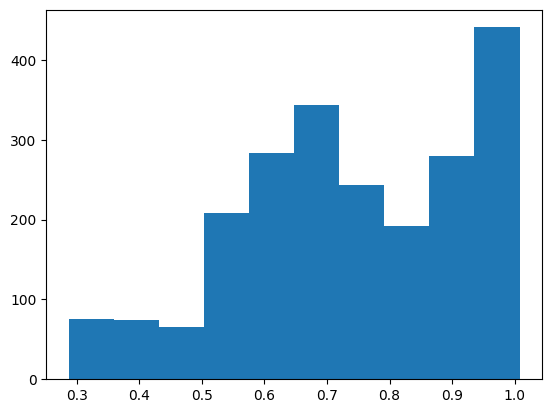

In [137]:
plt.hist(compute_cosine_sim(ref_gradients, ref_gradients).flatten())


(array([4.20000e+01, 1.76000e+02, 7.70000e+02, 2.00000e+00, 5.40000e+01,
        3.32800e+03, 1.26200e+03, 5.19200e+03, 8.34000e+03, 2.30834e+05]),
 array([-0.38085938, -0.24199219, -0.103125  ,  0.03574219,  0.17460938,
         0.31347656,  0.45234376,  0.59121096,  0.7300781 ,  0.8689453 ,
         1.0078125 ]),
 <BarContainer object of 10 artists>)

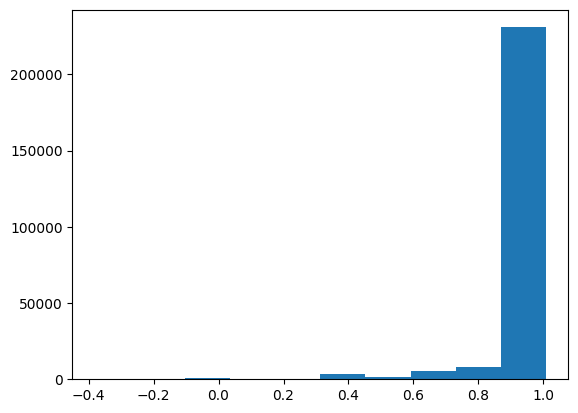

In [138]:
plt.hist(compute_cosine_sim(test_gradients, test_gradients).flatten())


In [129]:
compute_cosine_sim(ref_gradients, test_gradients).mean(dim=0)

tensor([-0.1932, -0.0338, -0.0179, -0.1111, -0.1175, -0.1736, -0.0341, -0.0383,
        -0.0070,  0.0161,  0.0260,  0.0362,  0.0311,  0.0369,  0.0395,  0.0429,
         0.0731,  0.0616,  0.0705,  0.0792,  0.0817,  0.0881,  0.0920,  0.1145,
         0.1087,  0.1068,  0.1012,  0.1005,  0.1034,  0.0990,  0.1030,  0.1048,
         0.1046,  0.1021,  0.1047,  0.1055,  0.1149,  0.1134,  0.1118,  0.1133,
         0.1192,  0.1215,  0.1504,  0.1396,  0.1429,  0.1442,  0.1455,  0.1475,
         0.1387,  0.1407,  0.1418,  0.1474,  0.1467,  0.1592,  0.1659,  0.1660,
         0.1621,  0.1615,  0.1632,  0.1559,  0.1538,  0.1456,  0.1485,  0.1490,
         0.1621,  0.1550,  0.1485,  0.1673,  0.1912,  0.1919,  0.1880,  0.1894,
         0.1900,  0.1868,  0.1883,  0.1921,  0.1957,  0.1955,  0.1987,  0.1986,
         0.1864,  0.1864,  0.1883,  0.1893,  0.2004,  0.1977,  0.2041,  0.2092,
         0.1989,  0.1989,  0.1988,  0.2001,  0.2013,  0.2051,  0.2055,  0.2031,
         0.2032,  0.2034,  0.2251,  0.22

In [128]:
compute_cosine_sim(ref_gradients, gen_gradients).max(dim=0).indices

tensor([41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
         5.,  3.,  5.,  1.,  2.,  4.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,
         8.,  7.,  5.,  6., 10., 19.,  9.,  7., 34., 16., 18., 27., 52.,
        56., 45., 45., 28., 10., 11., 23.,  3., 15.]),
 array([-0.13378906, -0.12965821, -0.12552734, -0.12139648, -0.11726563,
        -0.11313476, -0.10900391, -0.10487305, -0.10074219, -0.09661133,
        -0.09248047, -0.08834961, -0.08421875, -0.08008789, -0.07595703,
        -0.07182617, -0.06769531, -0.06356445, -0.05943359, -0.05530274,
        -0.05117188, -0.04704101, -0.04291015, -0.0387793 , -0.03464844,
        -0.03051758, -0.02638672, -0.02225586, -0.018125  , -0.013994

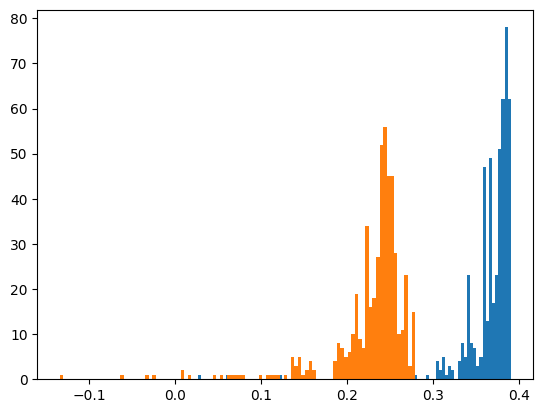

In [123]:
import matplotlib.pyplot as plt

plt.hist(compute_cosine_sim(ref_gradients, gen_gradients).max(dim=0).values, 100)
plt.hist(compute_cosine_sim(ref_gradients, test_gradients).max(dim=0).values, 100)

(array([3.0000e+01, 4.4000e+01, 1.1200e+02, 1.3000e+02, 5.2000e+01,
        4.5000e+01, 2.4000e+01, 4.0000e+00, 1.2000e+01, 1.9000e+01,
        9.1000e+01, 5.3400e+02, 2.8100e+02, 4.2000e+01, 2.2000e+01,
        1.5000e+01, 1.3000e+01, 6.0000e+00, 2.0000e+00, 3.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        3.0000e+00, 1.7000e+01, 3.5000e+01, 1.1300e+02, 1.7200e+02,
        1.0400e+02, 2.6000e+01, 1.9000e+01, 5.3000e+01, 5.0000e+01,
        1.5900e+02, 1.3300e+02, 7.1000e+01, 3.1000e+01, 1.3000e+01,
        1.3800e+02, 1.6000e+02, 1.3400e+02, 1.6700e+02, 1.4300e+02,
        2.2200e+02, 2.2700e+02, 1.6500e+02, 2.1500e+02, 2.1200e+02,
        1.1600e+02, 1.4400e+02, 7.2000e+01, 1.3500e+02, 1.0000e+02,
        3.4000e+01, 2.1000e+01, 7.0000e+00, 1.5000e+01, 7.3000e+01,
        1.8800e+02, 4.1400e+02, 4.7000e+02, 9.53

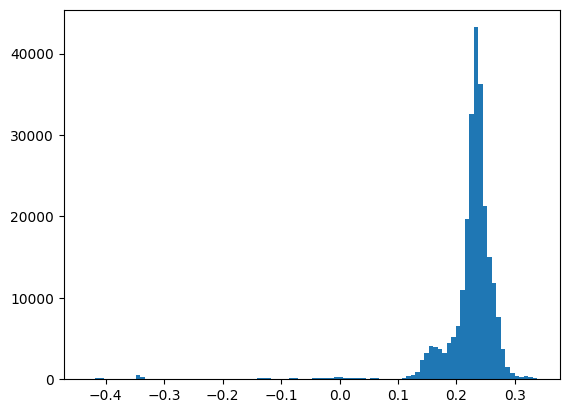

In [122]:
import matplotlib.pyplot as plt

plt.hist(compute_cosine_sim(test_gradients, gen_gradients).flatten(), 100)